# 감정 분석

## 주요 성능 지표

####F1 Score (Micro)

전체 클래스의 True Positive, False Positive, False Negative를 합산하여 Precision과 Recall을 계산한 뒤, 이들의 조화평균(Harmonic Mean)으로 산출하는 F1 Score입니다.

클래스 불균형이 심한 경우에도 전체적인 분류 성능을 잘 반영하며, 다중 레이블 분류에서는 전체 예측의 전반적인 성능을 나타냅니다.

####F1 Score (Macro)

각 클래스별로 F1 Score를 따로 계산한 후, 이 값들의 산술평균을 내는 방식입니다.

데이터 내에서 드물게 등장하는 감정(클래스)도 동일한 비중으로 평가하므로, 모든 감정의 예측 성능을 고르게 보고 싶을 때 중요합니다.

####Precision (Micro)

전체 예측에서 True Positive의 비율을 계산합니다. 즉, 예측한 감정 중 실제로 맞춘 감정의 비율을 의미합니다.

Micro 방식이므로, 모든 클래스의 TP와 FP를 합산해서 계산합니다.

####Recall (Micro)

전체 실제 감정 중에서 모델이 맞게 예측한 감정의 비율을 의미합니다.

역시 Micro 방식으로, 모든 클래스의 TP와 FN을 합산해서 계산합니다.

####Hamming Loss

다중 레이블 분류에서 각 샘플마다 잘못 예측된 레이블의 비율을 의미합니다.

값이 낮을수록 예측이 실제와 더 많이 일치하며, 전체 예측에서 오분류된 레이블의 비율을 직관적으로 보여줍니다.

####Exact Match Ratio

각 샘플에 대해 모든 감정을 완벽하게 맞춘 경우의 비율입니다.

다중 감정 분석에서는 모든 감정 조합을 정확히 맞추는 것이 매우 어렵기 때문에 일반적으로 값이 낮게 나옵니다.

## 일기 데이터에서 중요한 지표

일기 데이터는 한 번에 여러 감정이 섞여 있고, 감정별로 등장 빈도가 다를 수 있습니다.

드물게 나타나는 감정도 놓치지 않는 것이 중요합니다.

감정의 정확한 조합을 완벽히 맞추는 것(Exact Match)은 현실적으로 어렵고, 실질적인 감정 탐지 성능을 반영하지 못합니다.


####Macro F1:   
모든 감정(클래스)을 고르게 평가하므로, 흔하지 않은 감정까지 놓치지 않고 예측하는 모델을 선호할 때 가장 중요합니다. 일기 데이터처럼 감정 다양성이 중요한 경우 적합합니다.

####Micro F1:   
전체 데이터 기준의 예측 성능을 보여주며, 클래스 불균형이 심할 때도 전체적인 모델 성능을 신뢰할 수 있습니다.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


#### 모델 성능 개선
#### hun3359/klue-bert-base-sentiment 모델 구조 개선
#### BertCNN 구조 개선 +focalloss 적용

In [ ]:
#!pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!pip install --upgrade transformers

In [ ]:
# 세션 다시 시작

In [ ]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import torch
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from kss import split_sentences
import torch.nn as nn
import torch.nn.functional as F
import random
from transformers import PreTrainedModel, PretrainedConfig, AutoModel, AutoTokenizer, AutoConfig
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss, accuracy_score

In [ ]:
# 감정 컬럼 정의
emotion_columns = [
    '감사한','그저 그런','기쁜','당황한','만족스러운','분노한','불안한',
    '스트레스 받는','슬픈','외로운','우울한','자신하는','편안한','흥분한'
]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diary_sentiment_analysis/train_diary_with_emotions.csv")
df

,category,title,text,exist_emotions
0,비출판물 > 일기,5학년을 마치며....,5학년을 마치며.... ...,"['기쁜', '감사한', '슬픈']"
1,비출판물 > 일기,<name1>의 깜짝 등장,2018/1/20 토요일 날씨 오늘은 <name2>이의 유치원친구들이 놀러왔다.일등...,"['기쁜', '만족스러운']"
2,비출판물 > 일기,<name2>집에 초대,<name1>누나랑 같이 <name2>집에같다 <name2> 놀이터에서 물이나와 서...,"['기쁜', '만족스러운']"
3,비출판물 > 일기,Happy,다언어 합창제를 했다. 우리 라보 노래 제목은 Happy였다. 그런데 내 짝꿍이 나...,"['기쁜', '만족스러운', '감사한']"
4,비출판물 > 일기,TV,앞으로 꼭 발명되어야 하든 발명품은 똑똑상자 TV입니다. 왜냐하면 제가 TV를 좋아...,"['기쁜', '만족스러운']"
...,...,...,...,...
4175,비출판물 > 일기,힘들다,요즈음 엄마가 회사 일 때문에 바쁘셔서 밥을 못 챙겨 주신다. 나는 밥과 반찬을 잘...,"['슬픈', '흥분한', '불안한']"
4176,비출판물 > 일기,힘들면서 좋았던 날,<힘들면서 좋았던 날> 오늘 아침 8시에 일어났다. 조금 피곤했지만 또 잠들기는 싫...,['그저 그런']
4177,비출판물 > 일기,힘들었던 날.,오늘은 감정적으로 매우 힘든 날이었다. 우울하고 지치고... 나갈 곳은 없고 하고싶...,"['우울한', '슬픈', '외로운']"
4178,비출판물 > 일기,힘은 솟아나지 않는다.,힘은 솟아나지 않는다. 힘이란 연속되면서 이어진다. 관성과 같다. 나는 언제나 솟구...,"['우울한', '슬픈', '외로운']"


In [ ]:
print(df['exist_emotions'].head(10))
print(df['exist_emotions'].apply(type).value_counts())

0        ['기쁜', '감사한', '슬픈']
1            ['기쁜', '만족스러운']
2            ['기쁜', '만족스러운']
3     ['기쁜', '만족스러운', '감사한']
4            ['기쁜', '만족스러운']
5    ['자신하는', '기쁜', '만족스러운']
6              ['슬픈', '분노한']
7     ['기쁜', '만족스러운', '감사한']
8            ['기쁜', '만족스러운']
9     ['기쁜', '불안한', '만족스러운']
Name: exist_emotions, dtype: object
exist_emotions
<class 'str'>    4180
Name: count, dtype: int64


In [ ]:


# 1. 문자열을 리스트로 안전하게 변환
def safe_literal_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except Exception:
            return []
    elif isinstance(val, list):
        return val
    else:
        return []

df['exist_emotions'] = df['exist_emotions'].apply(safe_literal_eval)

# 2. 데이터 전체에서 고유 감정 라벨 추출
all_emotions = sorted(
    set(
        emotion.strip()
        for emotions in df['exist_emotions']
        for emotion in emotions
        if isinstance(emotion, str) and len(emotion.strip()) > 1
    )
)
print("고유 감정 라벨:", all_emotions)

# 3. 멀티-핫 인코딩
mlb = MultiLabelBinarizer(classes=all_emotions)
multi_hot = mlb.fit_transform(df['exist_emotions'])
df_multi_hot = pd.DataFrame(multi_hot, columns=mlb.classes_)

# 4. 결과 확인
print(df_multi_hot.head())


고유 감정 라벨: ['감사한', '그저 그런', '기쁜', '당황한', '만족스러운', '분노한', '불안한', '스트레스 받는', '슬픈', '외로운', '우울한', '자신하는', '편안한', '흥분한']
   감사한  그저 그런  기쁜  당황한  만족스러운  분노한  불안한  스트레스 받는  슬픈  외로운  우울한  자신하는  편안한  흥분한
0    1      0   1    0      0    0    0        0   1    0    0     0    0    0
1    0      0   1    0      1    0    0        0   0    0    0     0    0    0
2    0      0   1    0      1    0    0        0   0    0    0     0    0    0
3    1      0   1    0      1    0    0        0   0    0    0     0    0    0
4    0      0   1    0      1    0    0        0   0    0    0     0    0    0


In [ ]:
df_final = pd.concat([df, df_multi_hot], axis=1)
df_final

,category,title,text,exist_emotions,감사한,그저 그런,기쁜,당황한,만족스러운,분노한,불안한,스트레스 받는,슬픈,외로운,우울한,자신하는,편안한,흥분한
0,비출판물 > 일기,5학년을 마치며....,5학년을 마치며.... ...,"[기쁜, 감사한, 슬픈]",1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,비출판물 > 일기,<name1>의 깜짝 등장,2018/1/20 토요일 날씨 오늘은 <name2>이의 유치원친구들이 놀러왔다.일등...,"[기쁜, 만족스러운]",0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,비출판물 > 일기,<name2>집에 초대,<name1>누나랑 같이 <name2>집에같다 <name2> 놀이터에서 물이나와 서...,"[기쁜, 만족스러운]",0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,비출판물 > 일기,Happy,다언어 합창제를 했다. 우리 라보 노래 제목은 Happy였다. 그런데 내 짝꿍이 나...,"[기쁜, 만족스러운, 감사한]",1,0,1,0,1,0,0,0,0,0,0,0,0,0
4,비출판물 > 일기,TV,앞으로 꼭 발명되어야 하든 발명품은 똑똑상자 TV입니다. 왜냐하면 제가 TV를 좋아...,"[기쁜, 만족스러운]",0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,비출판물 > 일기,힘들다,요즈음 엄마가 회사 일 때문에 바쁘셔서 밥을 못 챙겨 주신다. 나는 밥과 반찬을 잘...,"[슬픈, 흥분한, 불안한]",0,0,0,0,0,0,1,0,1,0,0,0,0,1
4176,비출판물 > 일기,힘들면서 좋았던 날,<힘들면서 좋았던 날> 오늘 아침 8시에 일어났다. 조금 피곤했지만 또 잠들기는 싫...,[그저 그런],0,1,0,0,0,0,0,0,0,0,0,0,0,0
4177,비출판물 > 일기,힘들었던 날.,오늘은 감정적으로 매우 힘든 날이었다. 우울하고 지치고... 나갈 곳은 없고 하고싶...,"[우울한, 슬픈, 외로운]",0,0,0,0,0,0,0,0,1,1,1,0,0,0
4178,비출판물 > 일기,힘은 솟아나지 않는다.,힘은 솟아나지 않는다. 힘이란 연속되면서 이어진다. 관성과 같다. 나는 언제나 솟구...,"[우울한, 슬픈, 외로운]",0,0,0,0,0,0,0,0,1,1,1,0,0,0


In [ ]:
# 클래스 가중치(pos_weight) 계산
pos_counts = df_multi_hot.sum(axis=0).values
neg_counts = len(df_multi_hot) - pos_counts
pos_weight = torch.tensor(neg_counts / pos_counts, dtype=torch.float)

In [ ]:
# 토크나이저 불러오기
MODEL_NAME = "hun3359/klue-bert-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
# chunk 함수 정의

def chunk_text_with_kss(text, tokenizer, max_tokens=512):
    sentences = split_sentences(str(text))
    chunks = []
    current_chunk = []
    current_length = 0
    for sentence in sentences:
        encoded = tokenizer.encode(sentence, add_special_tokens=True)
        tokenized_len = len(encoded)
        if tokenized_len > max_tokens:
            words = sentence.split()
            chunk = []
            chunk_len = 0
            for word in words:
                word_encoded = tokenizer.encode(word, add_special_tokens=False)
                word_len = len(word_encoded)
                if chunk_len + word_len > max_tokens:
                    chunks.append(' '.join(chunk))
                    chunk = []
                    chunk_len = 0
                chunk.append(word)
                chunk_len += word_len
            if chunk:
                chunks.append(' '.join(chunk))
            current_length = 0
            current_chunk = []
            continue
        if current_length + tokenized_len <= max_tokens:
            current_chunk.append(sentence)
            current_length += tokenized_len
        else:
            chunks.append(' '.join(current_chunk))
            current_chunk = [sentence]
            current_length = tokenized_len
    if current_chunk:
        chunks.append(' '.join(current_chunk))
    return chunks


In [ ]:
# chunk별 학습 데이터 생성

train_texts = []
train_labels = []
diary_ids = []

for idx, row in tqdm(df_final.iterrows(), total=len(df_final)):
    text = row['text']
    labels = row[emotion_columns].values.astype(int)
    chunks = chunk_text_with_kss(text, tokenizer, max_tokens=512)
    for chunk in chunks:
        train_texts.append(chunk)
        train_labels.append(labels)
        diary_ids.append(idx)


  0%|          | 0/4180 [00:00<?, ?it/s]WARNING:root:Oh! You have mecab in your environment. Kss will take this as a backend! :D

100%|██████████| 4180/4180 [02:15<00:00, 30.94it/s]


In [ ]:
print("총 학습 데이터(Chunk) 개수:", len(train_texts))
print(len(train_labels))
print(len(diary_ids))

총 학습 데이터(Chunk) 개수: 5434
5434
5434


In [ ]:
# 학습/검증 데이터 분할

X_train, X_val, y_train, y_val, train_diary_ids, val_diary_ids = train_test_split(
    train_texts, train_labels, diary_ids, test_size=0.2, random_state=1234
)


In [ ]:
# 토크나이즈

def tokenize_function(texts):
    return tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )

train_encodings = tokenize_function(X_train)
val_encodings = tokenize_function(X_val)


In [ ]:
# PyTorch Dataset 정의

class EmotionDataset(Dataset):
    def __init__(self, encodings, labels, diary_ids):
        self.encodings = encodings
        self.labels = labels
        self.diary_ids = diary_ids

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        item['diary_id'] = self.diary_ids[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, y_train, train_diary_ids)
val_dataset = EmotionDataset(val_encodings, y_val, val_diary_ids)

In [ ]:


# set_seed 함수 정의

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# seed 고정 (모델 초기화 전)
set_seed(1234)

# FocalLoss(nn.Module) 정의

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, pos_weight=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.pos_weight = pos_weight
        self.reduction = reduction

    def forward(self, logits, targets):
        bce_loss = F.binary_cross_entropy_with_logits(
            logits, targets, reduction='none', pos_weight=self.pos_weight
        ) if self.pos_weight is not None else F.binary_cross_entropy_with_logits(
            logits, targets, reduction='none'
        )
        probs = torch.sigmoid(logits)
        pt = torch.where(targets == 1, probs, 1 - probs)
        focal_weight = self.alpha * (1 - pt) ** self.gamma
        loss = focal_weight * bce_loss
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss


# Trainer용 compute_metrics 함수 정의
def trainer_compute_metrics(pred):
    threshold = 0.5
    preds = pred.predictions
    labels = pred.label_ids
    preds = (preds > threshold).astype(int)
    f1_micro = f1_score(labels, preds, average='micro')
    f1_macro = f1_score(labels, preds, average='macro')
    precision_micro = precision_score(labels, preds, average='micro', zero_division=0)
    recall_micro = recall_score(labels, preds, average='micro', zero_division=0)
    hamming = hamming_loss(labels, preds)
    exact_match = accuracy_score(labels, preds)
    return {
        'eval_f1_micro': f1_micro,
        'eval_f1_macro': f1_macro,
        'eval_precision_micro': precision_micro,
        'eval_recall_micro': recall_micro,
        'eval_hamming_loss': hamming,
        'eval_exact_match_ratio': exact_match
    }
# 1. Config 정의 (PretrainedConfig 상속)
class BertCNNConfig(PretrainedConfig):
    model_type = "bertcnn"
    def __init__(
        self,
        num_labels=14,
        hidden_size=768,
        conv_output_channels=256,
        kernel_size=3,
        pretrained_model_name=MODEL_NAME,
        **kwargs
    ):
        super().__init__(**kwargs)
        self.num_labels = num_labels
        self.hidden_size = hidden_size
        self.conv_output_channels = conv_output_channels
        self.kernel_size = kernel_size
        self.pretrained_model_name = pretrained_model_name

# 2. 모델 정의 (PreTrainedModel 상속)
class BertCNNForMultiLabel(PreTrainedModel):
    config_class = BertCNNConfig
    def __init__(self, config):
        super().__init__(config)
        self.bert = AutoModel.from_pretrained(
            config.pretrained_model_name,
            config=AutoConfig.from_pretrained(config.pretrained_model_name)
        )
        self.conv = nn.Conv1d(
            config.hidden_size,
            config.conv_output_channels,
            kernel_size=config.kernel_size,
            padding=1
        )
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.classifier = nn.Linear(config.conv_output_channels, config.num_labels)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, labels=None):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        x = outputs.last_hidden_state.transpose(1, 2)
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x).squeeze(-1)
        logits = self.classifier(x)
        return {"logits": logits}

# 3. 모델 초기화 (PreTrainedModel 버전만 사용)
config = BertCNNConfig(
    num_labels=len(emotion_columns),
    pretrained_model_name=MODEL_NAME
)
model = BertCNNForMultiLabel(config)
# 커스텀 Trainer 정의 (여기서 pos_weight 사용)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = FocalLoss(
            alpha=0.25, gamma=2.0, pos_weight=pos_weight.to(logits.device)
        )
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/diary_sentiment_analysis/klue_bert_base_sentiment_bertcnn_focalloss_results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    eval_strategy="steps",
    save_steps=250,
    eval_steps=250,
    logging_dir='/content/drive/MyDrive/diary_sentiment_analysis/klue_bert_base_sentiment_bertcnn_focalloss_logs',
    logging_steps=50,
    gradient_accumulation_steps=4,
    learning_rate=2.8878377396620025e-05,
    weight_decay=0.07228867922991151,
    warmup_steps=230,
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1_macro",
    greater_is_better=True,
    report_to="none",
    save_total_limit=2,
)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=trainer_compute_metrics,
)

config.json:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
# 모델 학습

trainer.train()


Step,Training Loss,Validation Loss,F1 Micro,F1 Macro,Precision Micro,Recall Micro,Hamming Loss,Exact Match Ratio
250,0.046300,0.047369,0.573556,0.521113,0.699558,0.486016,0.139243,0.110396
500,0.027100,0.050390,0.638339,0.582122,0.740324,0.561050,0.122487,0.179393


TrainOutput(global_step=680, training_loss=0.040961195353199455, metrics={'train_runtime': 2102.7584, 'train_samples_per_second': 10.336, 'train_steps_per_second': 0.323, 'total_flos': 5758255928678400.0, 'train_loss': 0.040961195353199455, 'epoch': 5.0})

In [ ]:
model.save_pretrained('/content/drive/MyDrive/diary_sentiment_analysis/bertcnn_focalloss_sentiment_ckpt')

In [ ]:
# 예측 및 일기 단위 결과 집계

# 검증 데이터셋: X_val (chunk 텍스트), val_diary_ids (각 chunk의 일기 인덱스)

val_df = pd.DataFrame({'text': X_val, 'diary_id': val_diary_ids})

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = trainer.model
model.to(device)

results = []
threshold = 0.5
for diary_id, group in val_df.groupby('diary_id'):
    all_probs = []
    for chunk in group['text']:
        inputs = tokenizer(chunk, return_tensors='pt', truncation=True, max_length=512)
        # 모든 입력 텐서를 GPU로 이동
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.sigmoid(outputs['logits']).cpu().numpy()[0]
            all_probs.append(probs)
    mean_probs = np.mean(all_probs, axis=0)
    predicted_labels = (mean_probs >= threshold).astype(int)
    predicted_emotions = [emotion_columns[i] for i, p in enumerate(predicted_labels) if p == 1]
    results.append({
        'diary_id': diary_id,
        'predicted_emotions': predicted_emotions,
        'probs': mean_probs
    })

In [ ]:
#예측 결과와 실제 라벨로 평가 지표 계산

def compute_metrics(preds, labels):
    f1_micro = f1_score(labels, preds, average='micro')
    f1_macro = f1_score(labels, preds, average='macro')
    precision_micro = precision_score(labels, preds, average='micro')
    recall_micro = recall_score(labels, preds, average='micro')
    hamming = hamming_loss(labels, preds)
    exact_match = accuracy_score(labels, preds)
    return {
        'f1_micro': f1_micro,
        'f1_macro': f1_macro,
        'precision_micro': precision_micro,
        'recall_micro': recall_micro,
        'hamming_loss': hamming,
        'exact_match_ratio': exact_match
    }

# 예측값과 실제값 준비
preds_list = []
labels_list = []
for r in results:
    preds_list.append(np.array([1 if e in r['predicted_emotions'] else 0 for e in emotion_columns]))
    true_labels = df_final.loc[r['diary_id'], emotion_columns].values.astype(int)
    labels_list.append(true_labels)

preds = np.array(preds_list)
labels = np.array(labels_list)

metrics = compute_metrics(preds, labels)

def print_metrics(metrics):
    print("Evaluation Metrics:")
    print(f"F1 Score (Micro): {metrics['f1_micro']:.4f}")
    print(f"F1 Score (Macro): {metrics['f1_macro']:.4f}")
    print(f"Precision (Micro): {metrics['precision_micro']:.4f}")
    print(f"Recall (Micro): {metrics['recall_micro']:.4f}")
    print(f"Hamming Loss: {metrics['hamming_loss']:.4f}")
    print(f"Exact Match Ratio: {metrics['exact_match_ratio']:.4f}")

print_metrics(metrics)


Evaluation Metrics:
F1 Score (Micro): 0.6657
F1 Score (Macro): 0.5946
Precision (Micro): 0.5758
Recall (Micro): 0.7890
Hamming Loss: 0.1520
Exact Match Ratio: 0.1431


#### 512 토큰을 넘지 않은 일기 데이터 셋에서의 예측 성능 보기

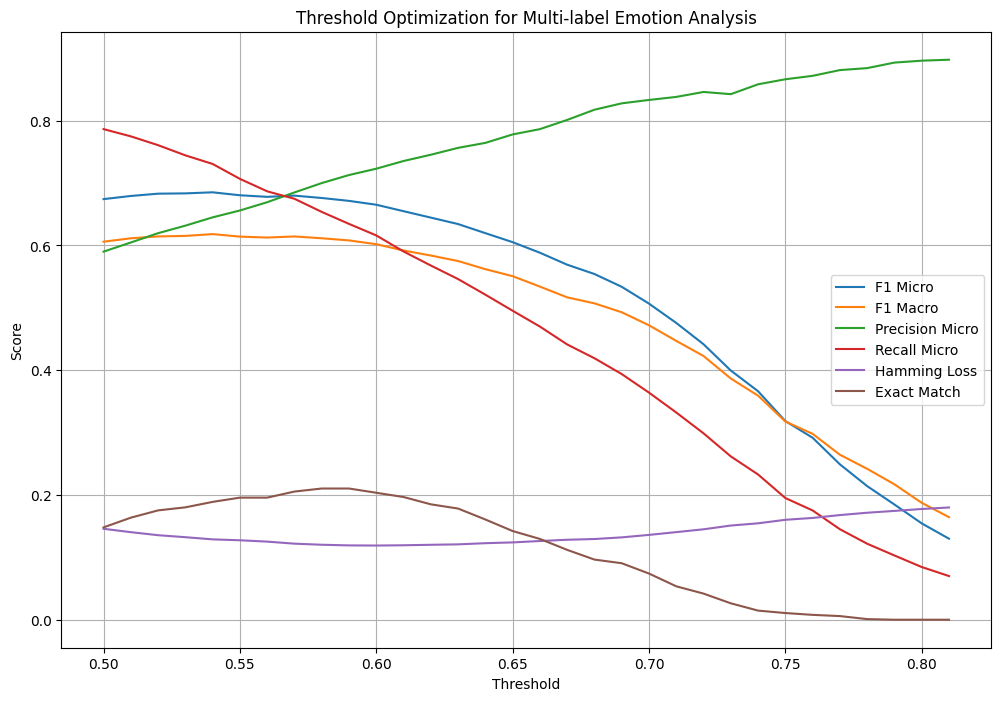

최적 threshold: 0.54 (F1 Micro=0.6851)


In [ ]:
# 1. 필수 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss, accuracy_score
import torch

# 2. 모델 불러오기 (GPU 설정 포함)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertCNNForMultiLabel.from_pretrained('/content/drive/MyDrive/diary_sentiment_analysis/bertcnn_focalloss_sentiment_ckpt')
model.to(device)

# 3. 512 토큰 이하 검증 데이터 추출
# -------------------------------------------
unique_val_diary_ids = set(val_diary_ids)
valid_diary_ids = []
for diary_id in unique_val_diary_ids:
    text = df_final.loc[diary_id, 'text']
    token_count = len(tokenizer.tokenize(text))
    if token_count <= 512:
        valid_diary_ids.append(diary_id)

filtered_val_indices = [i for i, diary_id in enumerate(val_diary_ids) if diary_id in valid_diary_ids]
filtered_val_texts = [X_val[i] for i in filtered_val_indices]
filtered_val_labels = [y_val[i] for i in filtered_val_indices]

# 4. 예측 확률 계산 (모델 추론 1회만 수행)
# -------------------------------------------
results = []
val_df = pd.DataFrame({'text': X_val, 'diary_id': val_diary_ids})

for diary_id, group in val_df.groupby('diary_id'):
    all_probs = []
    for chunk in group['text']:
        inputs = tokenizer(chunk, return_tensors='pt', truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.sigmoid(outputs['logits']).cpu().numpy().squeeze()
            all_probs.append(probs)
    mean_probs = np.mean(all_probs, axis=0)
    results.append({
        'diary_id': diary_id,
        'probs': mean_probs  # 추후 threshold 적용을 위해 확률값 저장
    })

# 5. threshold별 성능 지표 계산
# -------------------------------------------
thresholds = np.arange(0.5, 0.81, 0.01)
metrics = {
    'f1_micro': [], 'f1_macro': [],
    'precision_micro': [], 'recall_micro': [],
    'hamming_loss': [], 'exact_match': []
}

for th in thresholds:
    preds_list = []
    # 각 threshold 적용
    for r in results:
        predicted_labels = (r['probs'] >= th).astype(int)
        preds_list.append(predicted_labels)

    # 지표 계산
    labels = np.array([df_final.loc[r['diary_id'], emotion_columns].values.astype(int) for r in results])
    preds = np.array(preds_list)

    metrics['f1_micro'].append(f1_score(labels, preds, average='micro'))
    metrics['f1_macro'].append(f1_score(labels, preds, average='macro'))
    metrics['precision_micro'].append(precision_score(labels, preds, average='micro'))
    metrics['recall_micro'].append(recall_score(labels, preds, average='micro'))
    metrics['hamming_loss'].append(hamming_loss(labels, preds))
    metrics['exact_match'].append(accuracy_score(labels, preds))

# 6. 성능 지표 시각화
# -------------------------------------------
plt.figure(figsize=(12, 8))
for metric, values in metrics.items():
    plt.plot(thresholds, values, label=metric.replace('_', ' ').title())

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Optimization for Multi-label Emotion Analysis')
plt.legend()
plt.grid(True)
plt.show()

# 7. 최적 threshold 선택 (F1 Micro 기준)
best_idx = np.argmax(metrics['f1_micro'])
best_threshold = thresholds[best_idx]
print(f"최적 threshold: {best_threshold:.2f} (F1 Micro={metrics['f1_micro'][best_idx]:.4f})")

In [ ]:
# threshold 0.54 적용하여 예측값 생성
threshold = 0.54
preds_list = []
for r in results:
    predicted_labels = (r['probs'] >= threshold).astype(int)
    preds_list.append(predicted_labels)
preds = np.array(preds_list)
labels = np.array([df_final.loc[r['diary_id'], emotion_columns].values.astype(int) for r in results])

# 성능 지표 계산
metrics_054 = {
    'f1_micro': f1_score(labels, preds, average='micro'),
    'f1_macro': f1_score(labels, preds, average='macro'),
    'precision_micro': precision_score(labels, preds, average='micro'),
    'recall_micro': recall_score(labels, preds, average='micro'),
    'hamming_loss': hamming_loss(labels, preds),
    'exact_match': accuracy_score(labels, preds)
}

# 결과 출력
for k, v in metrics_054.items():
    print(f"{k}: {v:.4f}")

f1_micro: 0.6851
f1_macro: 0.6181
precision_micro: 0.6450
recall_micro: 0.7306
hamming_loss: 0.1288
exact_match: 0.1889


In [ ]:
# preds: (N, num_labels) 이진 예측값

N = 100
predicted_emotions_list = []
for row in preds[:N]:
    predicted_emotions = [emotion_columns[j] for j, val in enumerate(row) if val == 1]
    predicted_emotions_list.append(predicted_emotions)


example_rows = []
for i, r in enumerate(results[:N]):
    diary_id = r['diary_id']
    diary_text = df_final.loc[diary_id, 'text']
    # 실제 감정
    true_labels = df_final.loc[diary_id, emotion_columns].values.astype(int)
    true_emotions = [emotion_columns[j] for j, val in enumerate(true_labels) if val == 1]
    # threshold 0.54 기준 예측 감정
    predicted_emotions = predicted_emotions_list[i]
    example_rows.append({
        'diary_id': diary_id,
        'diary_text': diary_text,
        'true_emotions': true_emotions,
        'predicted_emotions': predicted_emotions
    })

example_df = pd.DataFrame(example_rows)
example_df

,diary_id,diary_text,true_emotions,predicted_emotions
0,0,5학년을 마치며.... ...,"[감사한, 기쁜, 슬픈]","[감사한, 기쁜]"
1,7,오늘 눈이 와서 아빠와 눈사람을 만들었다. 눈싸움도 했는데 재미있었다. 집에 빨리 ...,"[감사한, 기쁜, 만족스러운]","[기쁜, 만족스러운, 흥분한]"
2,13,오늘은 운동회 날이다. 운동회날 우리 엄마는 얼굴에 그리는 걸 했다. 나는 언니 오...,"[감사한, 기쁜, 흥분한]","[기쁜, 만족스러운, 흥분한]"
3,18,2019.10.28. 편지콘서트 내가 이콘서트를보았을 때 느낀점은 곡중에는 운명이 ...,"[그저 그런, 기쁜, 만족스러운]","[기쁜, 만족스러운, 흥분한]"
4,19,2019.8.30 학예회준비(꿈끼 발표회) 매년마다 하는 꿈끼 발표회에서 할것을 정...,"[불안한, 스트레스 받는]","[불안한, 자신하는]"
...,...,...,...,...
95,327,"현재 2020년 2월 24일의 나는 2022년, 지금으로부터 2년뒤의 나에게 궁금한...","[만족스러운, 불안한, 슬픈]","[불안한, 자신하는]"
96,334,오늘도 연구실에 출근하여 실험과 기타 업무를 하고 있다. 이 연구실에 있는 것도 벌...,"[감사한, 만족스러운, 자신하는]","[감사한, 만족스러운, 자신하는, 편안한]"
97,337,"고등학교 삼 학년이 끝나고 벌써 2월이 된 지금, 저는 겨울 방학이기 때문에 열두 ...","[감사한, 기쁜, 만족스러운]","[감사한, 기쁜, 만족스러운]"
98,338,처음부터 쓰고 싶어서 쓴다. 오늘은 쓸 말이 많다. 아침에는 마음이 참 무거웠다. ...,"[분노한, 불안한, 우울한]","[불안한, 슬픈, 우울한, 자신하는]"


In [ ]:
# threshold 0.54 기준 예측값 생성
threshold = 0.54
preds_list = []
for r in results:
    predicted_labels = (r['probs'] >= threshold).astype(int)
    preds_list.append(predicted_labels)
preds = np.array(preds_list)
labels = np.array([df_final.loc[r['diary_id'], emotion_columns].values.astype(int) for r in results])

# 실제 값과 예측 값이 완전히 일치하는 샘플만 추출
matched_rows = []
for i, r in enumerate(results):
    if np.array_equal(labels[i], preds[i]):
        diary_id = r['diary_id']
        diary_text = df_final.loc[diary_id, 'text']
        true_emotions = [emotion_columns[j] for j, val in enumerate(labels[i]) if val == 1]
        predicted_emotions = [emotion_columns[j] for j, val in enumerate(preds[i]) if val == 1]
        matched_rows.append({
            'diary_id': diary_id,
            'diary_text': diary_text,
            'true_emotions': true_emotions,
            'predicted_emotions': predicted_emotions
        })

matched_df = pd.DataFrame(matched_rows)
print(matched_df.shape)  # 일치하는 샘플 개수 확인
matched_df.head()        # 일부 결과 미리보기

(194, 4)


,diary_id,diary_text,true_emotions,predicted_emotions
0,23,4/6 토요일 제목: (2019 국제 어린이 경제 아카데미) 2번째 수업 오늘 은행...,"[감사한, 기쁜, 만족스러운]","[감사한, 기쁜, 만족스러운]"
1,31,걱정하던 운전면허 필기시험 보는 날이다. <name1>이랑 학원에 가려고 버스를 기...,"[감사한, 기쁜, 만족스러운]","[감사한, 기쁜, 만족스러운]"
2,53,오늘은 미세먼지가 나빴다. 그렇지만 이모가 태워주신대서 병원이라도 다녀오기로 했다....,"[감사한, 기쁜, 만족스러운]","[감사한, 기쁜, 만족스러운]"
3,88,오늘 9시에 일어났는데 너무 일찍 일어나서 당황스러웠다 일어나서 프렌치토스트 전자레...,"[당황한, 분노한, 스트레스 받는]","[당황한, 분노한, 스트레스 받는]"
4,115,말과 행동은 다르긴 한데 유사하다. ‘말’이 ‘행동’의 한 삼분의 일이라고 믿고 있...,[그저 그런],[그저 그런]


In [ ]:
# threshold 0.54 기준 예측값 생성
threshold = 0.54
preds_list = []
for r in results:
    predicted_labels = (r['probs'] >= threshold).astype(int)
    preds_list.append(predicted_labels)
preds = np.array(preds_list)
labels = np.array([df_final.loc[r['diary_id'], emotion_columns].values.astype(int) for r in results])

# 전체 검증 데이터셋 결과 생성
all_rows = []
for i, r in enumerate(results):
    diary_id = r['diary_id']
    diary_text = df_final.loc[diary_id, 'text']
    true_emotions = [emotion_columns[j] for j, val in enumerate(labels[i]) if val == 1]
    predicted_emotions = [emotion_columns[j] for j, val in enumerate(preds[i]) if val == 1]
    all_rows.append({
        'diary_id': diary_id,
        'diary_text': diary_text,
        'true_emotions': true_emotions,
        'predicted_emotions': predicted_emotions
    })

all_df = pd.DataFrame(all_rows)

# 전체 데이터프레임 출력
all_df

,diary_id,diary_text,true_emotions,predicted_emotions
0,0,5학년을 마치며.... ...,"[감사한, 기쁜, 슬픈]","[감사한, 기쁜]"
1,7,오늘 눈이 와서 아빠와 눈사람을 만들었다. 눈싸움도 했는데 재미있었다. 집에 빨리 ...,"[감사한, 기쁜, 만족스러운]","[기쁜, 만족스러운, 흥분한]"
2,13,오늘은 운동회 날이다. 운동회날 우리 엄마는 얼굴에 그리는 걸 했다. 나는 언니 오...,"[감사한, 기쁜, 흥분한]","[기쁜, 만족스러운, 흥분한]"
3,18,2019.10.28. 편지콘서트 내가 이콘서트를보았을 때 느낀점은 곡중에는 운명이 ...,"[그저 그런, 기쁜, 만족스러운]","[기쁜, 만족스러운, 흥분한]"
4,19,2019.8.30 학예회준비(꿈끼 발표회) 매년마다 하는 꿈끼 발표회에서 할것을 정...,"[불안한, 스트레스 받는]","[불안한, 자신하는]"
...,...,...,...,...
1022,4161,집에 가다가 운동을 해야 한다. 안 하면 허리가 아프기 때문이다. 사실 허리 말고도...,"[그저 그런, 슬픈]","[그저 그런, 분노한, 불안한, 스트레스 받는, 우울한]"
1023,4163,흑당버블티먹고싶다 널린 체인점 카페에서 유행에 편승해서 낸 흑당시리즈 음료 말고 흑...,[그저 그런],[그저 그런]
1024,4170,해피의이사 <히야신스 관찰 일기3> ! 뉴스특보! 해피가 다자랐다. 나는 아주 뿌듯...,"[감사한, 기쁜, 만족스러운]","[감사한, 기쁜, 만족스러운]"
1025,4172,<히어로스포츠파크> 오늘 히어로 스포츠 파크에 갔다. 처음부 터 너무 무리하게 놀았...,"[기쁜, 만족스러운, 흥분한]","[기쁜, 만족스러운, 흥분한]"


##### 전체 검증 데이터셋

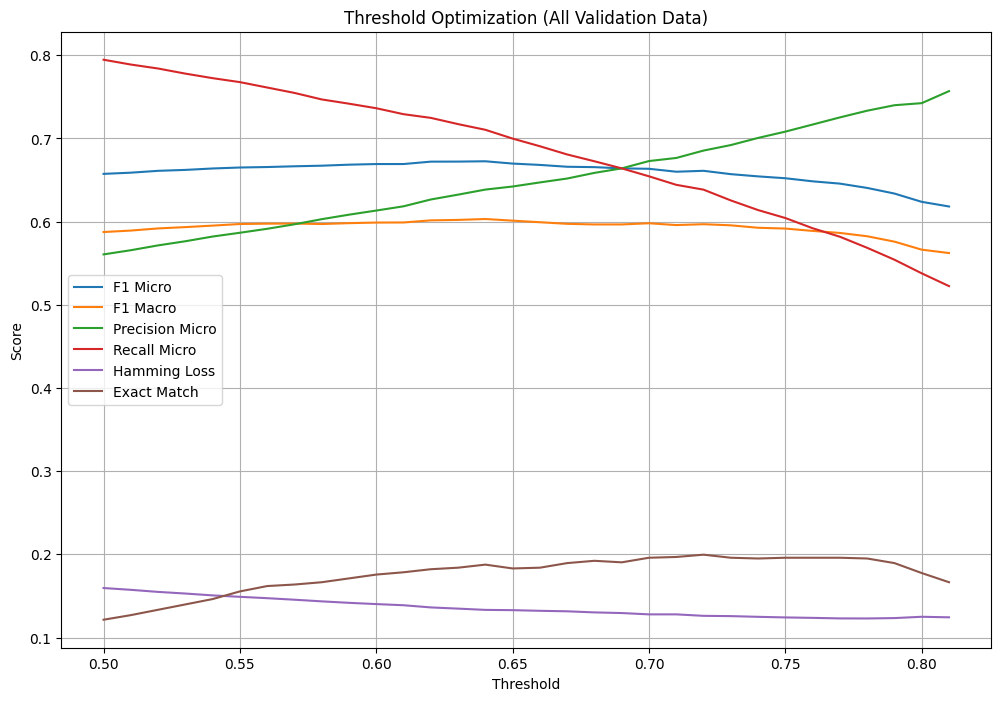

최적 threshold: 0.64 (F1 Micro=0.6726)


In [ ]:
# 전체 검증 데이터셋

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss, accuracy_score
import torch

# 1. 모델 불러오기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertCNNForMultiLabel.from_pretrained('/content/drive/MyDrive/diary_sentiment_analysis/bertcnn_sentiment_ckpt')
model.to(device)

# 2. 전체 검증 데이터셋에 대해 예측 확률 계산
results = []
for diary_id, text in zip(val_diary_ids, X_val):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.sigmoid(outputs['logits']).cpu().numpy().squeeze()
    results.append({
        'diary_id': diary_id,
        'probs': probs
    })

# 3. threshold별 성능 지표 계산
thresholds = np.arange(0.5, 0.81, 0.01)
metrics = {
    'f1_micro': [], 'f1_macro': [],
    'precision_micro': [], 'recall_micro': [],
    'hamming_loss': [], 'exact_match': []
}

for th in thresholds:
    preds_list = []
    for r in results:
        predicted_labels = (r['probs'] >= th).astype(int)
        preds_list.append(predicted_labels)
    preds = np.array(preds_list)
    labels = np.array([df_final.loc[r['diary_id'], emotion_columns].values.astype(int) for r in results])
    metrics['f1_micro'].append(f1_score(labels, preds, average='micro'))
    metrics['f1_macro'].append(f1_score(labels, preds, average='macro'))
    metrics['precision_micro'].append(precision_score(labels, preds, average='micro'))
    metrics['recall_micro'].append(recall_score(labels, preds, average='micro'))
    metrics['hamming_loss'].append(hamming_loss(labels, preds))
    metrics['exact_match'].append(accuracy_score(labels, preds))

# 4. 성능 지표 시각화
plt.figure(figsize=(12, 8))
for metric, values in metrics.items():
    plt.plot(thresholds, values, label=metric.replace('_', ' ').title())
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Optimization (All Validation Data)')
plt.legend()
plt.grid(True)
plt.show()

# 5. 최적 threshold(F1 Micro 기준) 출력
best_idx = np.argmax(metrics['f1_micro'])
best_threshold = thresholds[best_idx]
print(f"최적 threshold: {best_threshold:.2f} (F1 Micro={metrics['f1_micro'][best_idx]:.4f})")
